# Maskin Læring: Klassifisering av dyr

## Trening av vårt første CNN!
![l](https://www.managers.org.uk/wp-content/uploads/2020/03/BrainTraining.jpg)  
I denne notebooken kommer vi til å gjøre et par ting: 
1. Skrive inn studentnummeret vårt
2. Generere et nevralt nettverk(tenk en hjerne) med dette studentnummeret. 
3. Trene dette nettverket

Først så setter vi inn student nummeret vårt.

In [7]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm
os.environ["CUDA_VISIBLE_DEVICES"]="1"
kaggle_user= "uzaaft"
kaggle_api = "eef66e4e79f6db8c868a369edc57500c"
os.environ["KAGGLE_USERNAME"] = kaggle_user
os.environ["KAGGLE_KEY"] = kaggle_api
!pip install kaggle
!kaggle datasets download -d alessiocorrado99/animals10

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
animals10.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
!unzip -q animals10.zip 

replace raw-img/cane/OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [3]:
Student_nr = input("Hva er student nummeret ditt?")

random.seed(Student_nr)

activation_layers = [
            "relu",
            "sigmoid",
            "softmax",
            "softplus",
            "softsign",
            "tanh",
            "selu",
            "elu",
            "exponential",
]
number = random.randint(1, len(activation_layers))
return activation_layers[number]


Hva er student nummeret ditt?0


NameError: name 'random' is not defined

In [8]:
base_dir = './raw-img'
LABELS = os.listdir(base_dir)
LABELS.sort()
translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant",
                 "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat",
                 "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel",
                 "dog": "cane", "cavallo": "horse", "elephant" : "elefante", 
                 "butterfly": "farfalla", "chicken": "gallina", "cat": "gatto",
                 "cow": "mucca", "spider": "ragno", "squirrel": "scoiattolo"}
LABELS_english = list(translate.values())
base_dir + '/' + LABELS[0]
dataset=[]
testset=[]
count=0

for label in tqdm(LABELS):
    i=0
#     path = base_dir + '/' + label
    path = os.path.join(base_dir, label)
#     print(path)
    for img in os.listdir(path):
#         print(img)
        image=load_img(os.path.join(path, img), grayscale=False, color_mode='rgb', target_size=(75,75))
        image=img_to_array(image)
        image=image/255.0
        if i<1000:
            dataset.append([image,count])
            i+=1
        else:
            testset.append([image,count])
    count=count+1

X,y =zip(*dataset)
test, test_labels=zip(*testset)
y = to_categorical(y)
y=np.array(y)
X=np.array(X)
print("Train Shape:{}\nTrain Labels shape: {}".format(X.shape,y.shape))
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=99)

datagen = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.1,
    fill_mode="nearest"
)

  0%|          | 0/10 [00:00<?, ?it/s]

Train Shape:(10000, 75, 75, 3)
Train Labels shape: (10000, 10)


In [10]:
def predict_image(image):
    image=img_to_array(image)/255 
    prediction_image=np.array(image)
    prediction_image= np.expand_dims(image, axis=0)
    
    pred = model.predict(prediction_image)
    value = np.argmax(pred)
    print("Prediction : ", LABELS_english[value])

In [32]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(16, (3, 3), activation='elu', input_shape=(75, 75, 3), padding= "valid"))
model.add(tf.keras.layers.MaxPooling2D(3))

model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='elu', padding= "valid"))
model.add(tf.keras.layers.MaxPooling2D(2))

model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='elu', padding= "valid"))
model.add(tf.keras.layers.MaxPooling2D(1))


model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='elu', padding= "valid"))
model.add(tf.keras.layers.MaxPooling2D(1))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(64, activation='elu'))
model.add(tf.keras.layers.Dense(32, activation='elu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))



model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-3),
             metrics=['acc'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 73, 73, 16)        448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 11, 11, 32)        128       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 9, 9, 64)          18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 9, 9, 64)         

### I cellen ovenfor lager vi modellen. Vi prøver å gjette hvilket dyr det er på bildene med denne ulærte modellen

Prediction :  cane


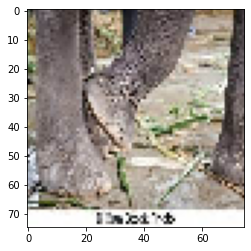

Prediction :  cat


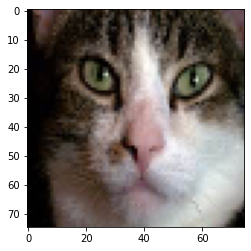

Prediction :  chicken


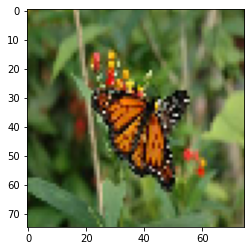

In [33]:
image=load_img("raw-img/elefante/OIP---LeldVL441fx5S66TGgVQAAAA.jpeg",target_size=(75,75))
predict_image(image)
plt.imshow(image)
plt.show()
image=load_img("raw-img/gatto/1006.jpeg",target_size=(75,75))
predict_image(image)
plt.imshow(image)
plt.show()
image=load_img("raw-img/farfalla/OIP--7K5JzW1ZEmrY2YRyVjFCQHaE7.jpeg",target_size=(75,75))
predict_image(image)
plt.imshow(image)
plt.show()

In [34]:
history = model.fit(
     datagen.flow(X_train, y_train, batch_size=128), 
    validation_data = (X_valid, y_valid),
    epochs=25
)

Epoch 1/25
63/63 [==============================] - 6s 95ms/step - loss: 2.4217 - acc: 0.1743 - val_loss: 2.1242 - val_acc: 0.2610
Epoch 2/25
63/63 [==============================] - 6s 91ms/step - loss: 2.1042 - acc: 0.2589 - val_loss: 2.3676 - val_acc: 0.1620
Epoch 3/25
63/63 [==============================] - 6s 92ms/step - loss: 1.9891 - acc: 0.3009 - val_loss: 2.6075 - val_acc: 0.1210
Epoch 4/25
63/63 [==============================] - 6s 93ms/step - loss: 1.8820 - acc: 0.3368 - val_loss: 2.3521 - val_acc: 0.1660
Epoch 5/25
63/63 [==============================] - 6s 96ms/step - loss: 1.8235 - acc: 0.3532 - val_loss: 2.2979 - val_acc: 0.2210
Epoch 6/25
63/63 [==============================] - 6s 93ms/step - loss: 1.7710 - acc: 0.3739 - val_loss: 2.4960 - val_acc: 0.1930
Epoch 7/25
63/63 [==============================] - 6s 92ms/step - loss: 1.7445 - acc: 0.3804 - val_loss: 1.8163 - val_acc: 0.3695
Epoch 8/25
63/63 [==============================] - 6s 92ms/step - loss: 1.7039 - a

### La oss se hvor bra modellen vår gjetter

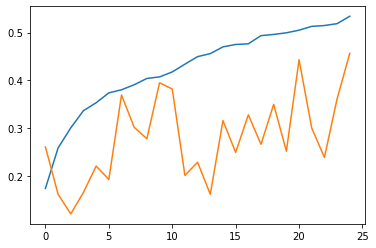

In [35]:
plt.plot(history.history['acc'], label = "Acc")
plt.plot(history.history['val_acc'], label = "Val Acc")

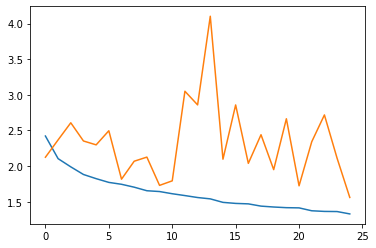

In [36]:
plt.plot(history.history['loss'], label = "loss")
plt.plot(history.history['val_loss'], label = "Val loss")

Prediction :  butterfly


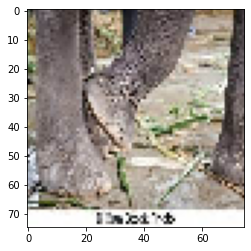

Prediction :  dog


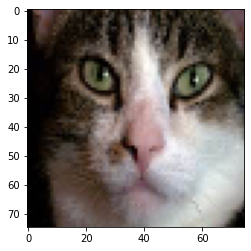

Prediction :  butterfly


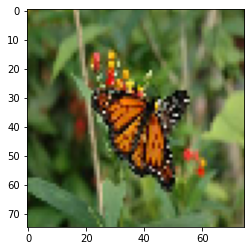

In [37]:
image=load_img("raw-img/elefante/OIP---LeldVL441fx5S66TGgVQAAAA.jpeg",target_size=(75,75))
predict_image(image)
plt.imshow(image)
plt.show()
image=load_img("raw-img/gatto/1006.jpeg",target_size=(75,75))
predict_image(image)
plt.imshow(image)
plt.show()
image=load_img("raw-img/farfalla/OIP--7K5JzW1ZEmrY2YRyVjFCQHaE7.jpeg",target_size=(75,75))
predict_image(image)
plt.imshow(image)
plt.show()

In [43]:
history = model.fit(
     datagen.flow(X_train, y_train, batch_size=128), 
    validation_data = (X_valid, y_valid),
    epochs=500, 
    initial_epoch = 25
)

Epoch 26/500
63/63 [==============================] - 6s 93ms/step - loss: 0.7955 - acc: 0.7284 - val_loss: 1.8279 - val_acc: 0.5015
Epoch 27/500
63/63 [==============================] - 6s 92ms/step - loss: 0.8044 - acc: 0.7230 - val_loss: 1.6639 - val_acc: 0.5470
Epoch 28/500
63/63 [==============================] - 6s 91ms/step - loss: 0.7793 - acc: 0.7335 - val_loss: 1.3499 - val_acc: 0.5870
Epoch 29/500
63/63 [==============================] - 6s 92ms/step - loss: 0.8014 - acc: 0.7268 - val_loss: 1.2118 - val_acc: 0.6170
Epoch 30/500
63/63 [==============================] - 6s 93ms/step - loss: 0.7815 - acc: 0.7319 - val_loss: 1.4900 - val_acc: 0.5670
Epoch 31/500
63/63 [==============================] - 6s 91ms/step - loss: 0.7905 - acc: 0.7258 - val_loss: 1.6775 - val_acc: 0.5240
Epoch 32/500
63/63 [==============================] - 6s 92ms/step - loss: 0.7766 - acc: 0.7306 - val_loss: 1.7266 - val_acc: 0.5235
Epoch 33/500
63/63 [==============================] - 6s 91ms/step - 

63/63 [==============================] - 6s 94ms/step - loss: 0.7174 - acc: 0.7523 - val_loss: 1.9241 - val_acc: 0.5005
Epoch 88/500
63/63 [==============================] - 6s 95ms/step - loss: 0.7309 - acc: 0.7500 - val_loss: 2.0139 - val_acc: 0.4830
Epoch 89/500
63/63 [==============================] - 6s 91ms/step - loss: 0.7484 - acc: 0.7391 - val_loss: 1.5493 - val_acc: 0.5560
Epoch 90/500
63/63 [==============================] - 6s 93ms/step - loss: 0.7130 - acc: 0.7534 - val_loss: 1.1252 - val_acc: 0.6530
Epoch 91/500
63/63 [==============================] - 6s 92ms/step - loss: 0.7138 - acc: 0.7595 - val_loss: 1.3135 - val_acc: 0.6115
Epoch 92/500
63/63 [==============================] - 6s 92ms/step - loss: 0.7324 - acc: 0.7506 - val_loss: 1.2038 - val_acc: 0.6385
Epoch 93/500
63/63 [==============================] - 6s 96ms/step - loss: 0.7151 - acc: 0.7525 - val_loss: 1.2863 - val_acc: 0.6235
Epoch 94/500
63/63 [==============================] - 6s 93ms/step - loss: 0.7034 

63/63 [==============================] - 6s 91ms/step - loss: 0.6795 - acc: 0.7649 - val_loss: 1.2980 - val_acc: 0.6150
Epoch 149/500
63/63 [==============================] - 6s 91ms/step - loss: 0.6567 - acc: 0.7781 - val_loss: 1.6198 - val_acc: 0.5645
Epoch 150/500
63/63 [==============================] - 6s 91ms/step - loss: 0.6680 - acc: 0.7691 - val_loss: 1.7969 - val_acc: 0.5350
Epoch 151/500
63/63 [==============================] - 6s 90ms/step - loss: 0.6588 - acc: 0.7749 - val_loss: 1.3743 - val_acc: 0.6200
Epoch 152/500
63/63 [==============================] - 6s 90ms/step - loss: 0.6861 - acc: 0.7682 - val_loss: 1.3227 - val_acc: 0.6175
Epoch 153/500
63/63 [==============================] - 6s 90ms/step - loss: 0.6700 - acc: 0.7721 - val_loss: 1.3257 - val_acc: 0.6140
Epoch 154/500
63/63 [==============================] - 6s 90ms/step - loss: 0.6685 - acc: 0.7716 - val_loss: 1.9620 - val_acc: 0.5245
Epoch 155/500
63/63 [==============================] - 6s 90ms/step - loss: 

63/63 [==============================] - 6s 90ms/step - loss: 0.6214 - acc: 0.7886 - val_loss: 1.3226 - val_acc: 0.6255
Epoch 210/500
63/63 [==============================] - 6s 92ms/step - loss: 0.6383 - acc: 0.7825 - val_loss: 1.4057 - val_acc: 0.6255
Epoch 211/500
63/63 [==============================] - 6s 91ms/step - loss: 0.6580 - acc: 0.7763 - val_loss: 1.4964 - val_acc: 0.6025
Epoch 212/500
63/63 [==============================] - 6s 93ms/step - loss: 0.6283 - acc: 0.7856 - val_loss: 1.2900 - val_acc: 0.6255
Epoch 213/500
63/63 [==============================] - 6s 90ms/step - loss: 0.6214 - acc: 0.7884 - val_loss: 1.3013 - val_acc: 0.6315
Epoch 214/500
63/63 [==============================] - 6s 91ms/step - loss: 0.6368 - acc: 0.7825 - val_loss: 1.3113 - val_acc: 0.6240
Epoch 215/500
63/63 [==============================] - 6s 90ms/step - loss: 0.6578 - acc: 0.7778 - val_loss: 1.7049 - val_acc: 0.5660
Epoch 216/500
63/63 [==============================] - 6s 91ms/step - loss: 

63/63 [==============================] - 6s 89ms/step - loss: 0.6001 - acc: 0.8000 - val_loss: 1.6367 - val_acc: 0.5590
Epoch 271/500
63/63 [==============================] - 6s 89ms/step - loss: 0.5904 - acc: 0.7995 - val_loss: 1.2995 - val_acc: 0.6385
Epoch 272/500
63/63 [==============================] - 6s 89ms/step - loss: 0.5810 - acc: 0.8044 - val_loss: 1.3992 - val_acc: 0.6080
Epoch 273/500
63/63 [==============================] - 6s 90ms/step - loss: 0.6002 - acc: 0.7945 - val_loss: 1.6281 - val_acc: 0.5840
Epoch 274/500
63/63 [==============================] - 6s 89ms/step - loss: 0.5995 - acc: 0.7915 - val_loss: 1.5762 - val_acc: 0.5735
Epoch 275/500
63/63 [==============================] - 6s 90ms/step - loss: 0.5976 - acc: 0.7985 - val_loss: 1.3152 - val_acc: 0.6315
Epoch 276/500
63/63 [==============================] - 6s 91ms/step - loss: 0.5835 - acc: 0.8015 - val_loss: 1.6338 - val_acc: 0.5815
Epoch 277/500
63/63 [==============================] - 6s 89ms/step - loss: 

63/63 [==============================] - 6s 88ms/step - loss: 0.5752 - acc: 0.8043 - val_loss: 1.2702 - val_acc: 0.6450
Epoch 332/500
63/63 [==============================] - 6s 89ms/step - loss: 0.5800 - acc: 0.8060 - val_loss: 1.4200 - val_acc: 0.6110
Epoch 333/500
63/63 [==============================] - 6s 91ms/step - loss: 0.5593 - acc: 0.8092 - val_loss: 1.3359 - val_acc: 0.6345
Epoch 334/500
63/63 [==============================] - 6s 90ms/step - loss: 0.5706 - acc: 0.8039 - val_loss: 1.3696 - val_acc: 0.6250
Epoch 335/500
63/63 [==============================] - 6s 90ms/step - loss: 0.5931 - acc: 0.7914 - val_loss: 1.3623 - val_acc: 0.6300
Epoch 336/500
63/63 [==============================] - 6s 91ms/step - loss: 0.5499 - acc: 0.8154 - val_loss: 1.2520 - val_acc: 0.6645
Epoch 337/500
63/63 [==============================] - 6s 89ms/step - loss: 0.5702 - acc: 0.8089 - val_loss: 1.2538 - val_acc: 0.6435
Epoch 338/500
63/63 [==============================] - 6s 90ms/step - loss: 

63/63 [==============================] - 6s 90ms/step - loss: 0.5427 - acc: 0.8171 - val_loss: 1.3599 - val_acc: 0.6305
Epoch 393/500
63/63 [==============================] - 6s 90ms/step - loss: 0.5467 - acc: 0.8131 - val_loss: 1.2599 - val_acc: 0.6625
Epoch 394/500
63/63 [==============================] - 6s 90ms/step - loss: 0.5510 - acc: 0.8144 - val_loss: 1.4956 - val_acc: 0.6190
Epoch 395/500
63/63 [==============================] - 6s 88ms/step - loss: 0.5558 - acc: 0.8148 - val_loss: 1.6807 - val_acc: 0.6035
Epoch 396/500
63/63 [==============================] - 6s 90ms/step - loss: 0.5522 - acc: 0.8120 - val_loss: 1.4970 - val_acc: 0.6185
Epoch 397/500
63/63 [==============================] - 6s 90ms/step - loss: 0.5397 - acc: 0.8189 - val_loss: 2.2717 - val_acc: 0.4790
Epoch 398/500
63/63 [==============================] - 6s 90ms/step - loss: 0.5448 - acc: 0.8155 - val_loss: 1.3944 - val_acc: 0.6405
Epoch 399/500
63/63 [==============================] - 6s 91ms/step - loss: 

63/63 [==============================] - 6s 90ms/step - loss: 0.5331 - acc: 0.8183 - val_loss: 1.6561 - val_acc: 0.5930
Epoch 454/500
63/63 [==============================] - 6s 90ms/step - loss: 0.5218 - acc: 0.8206 - val_loss: 1.6883 - val_acc: 0.5840
Epoch 455/500
63/63 [==============================] - 6s 90ms/step - loss: 0.5402 - acc: 0.8189 - val_loss: 1.7662 - val_acc: 0.5815
Epoch 456/500
63/63 [==============================] - 6s 89ms/step - loss: 0.5388 - acc: 0.8155 - val_loss: 1.6333 - val_acc: 0.5955
Epoch 457/500
63/63 [==============================] - 6s 90ms/step - loss: 0.5375 - acc: 0.8173 - val_loss: 1.3863 - val_acc: 0.6340
Epoch 458/500
63/63 [==============================] - 6s 90ms/step - loss: 0.5325 - acc: 0.8204 - val_loss: 1.3575 - val_acc: 0.6325
Epoch 459/500
63/63 [==============================] - 6s 90ms/step - loss: 0.5171 - acc: 0.8238 - val_loss: 1.8713 - val_acc: 0.5555
Epoch 460/500
63/63 [==============================] - 6s 89ms/step - loss: 

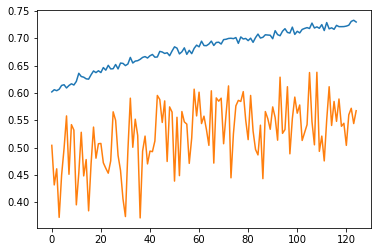

In [40]:
plt.plot(history.history['acc'], label = "Acc")
plt.plot(history.history['val_acc'], label = "Val Acc")

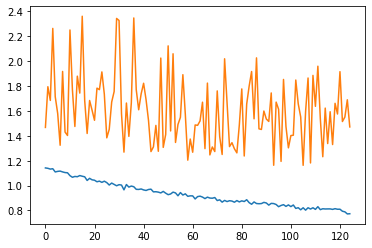

In [41]:
plt.plot(history.history['loss'],  label = "Loss")
plt.plot(history.history['val_loss'],  label = "Val loss")

Prediction :  squirrel


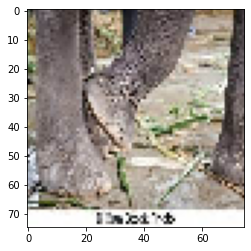

Prediction :  cat


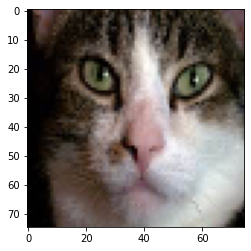

Prediction :  butterfly


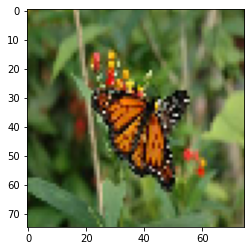

In [42]:
image=load_img("raw-img/elefante/OIP---LeldVL441fx5S66TGgVQAAAA.jpeg",target_size=(75,75))
predict_image(image)
plt.imshow(image)
plt.show()
image=load_img("raw-img/gatto/1006.jpeg",target_size=(75,75))
predict_image(image)
plt.imshow(image)
plt.show()
image=load_img("raw-img/farfalla/OIP--7K5JzW1ZEmrY2YRyVjFCQHaE7.jpeg",target_size=(75,75))
predict_image(image)
plt.imshow(image)
plt.show()

In [44]:
history = model.fit(
     datagen.flow(X_train, y_train, batch_size=128), 
    validation_data = (X_valid, y_valid),
    epochs=1000, 
    initial_epoch = 500
)

Epoch 501/1000
63/63 [==============================] - 6s 95ms/step - loss: 0.5229 - acc: 0.8210 - val_loss: 1.5750 - val_acc: 0.5985
Epoch 502/1000
63/63 [==============================] - 6s 95ms/step - loss: 0.5281 - acc: 0.8245 - val_loss: 1.5932 - val_acc: 0.5920
Epoch 503/1000
63/63 [==============================] - 6s 94ms/step - loss: 0.5203 - acc: 0.8220 - val_loss: 1.2758 - val_acc: 0.6525
Epoch 504/1000
63/63 [==============================] - 6s 93ms/step - loss: 0.5229 - acc: 0.8200 - val_loss: 1.1311 - val_acc: 0.6890
Epoch 505/1000
63/63 [==============================] - 6s 92ms/step - loss: 0.5198 - acc: 0.8200 - val_loss: 1.4853 - val_acc: 0.6250
Epoch 506/1000
63/63 [==============================] - 6s 92ms/step - loss: 0.5091 - acc: 0.8265 - val_loss: 1.4011 - val_acc: 0.6385
Epoch 507/1000
63/63 [==============================] - 6s 93ms/step - loss: 0.5179 - acc: 0.8204 - val_loss: 1.3442 - val_acc: 0.6615
Epoch 508/1000
63/63 [==============================] -

Epoch 562/1000
63/63 [==============================] - 6s 95ms/step - loss: 0.5173 - acc: 0.8234 - val_loss: 1.7252 - val_acc: 0.5830
Epoch 563/1000
63/63 [==============================] - 6s 96ms/step - loss: 0.4930 - acc: 0.8367 - val_loss: 1.3367 - val_acc: 0.6525
Epoch 564/1000
63/63 [==============================] - 6s 98ms/step - loss: 0.5019 - acc: 0.8317 - val_loss: 1.3424 - val_acc: 0.6505
Epoch 565/1000
63/63 [==============================] - 6s 93ms/step - loss: 0.5058 - acc: 0.8290 - val_loss: 1.2448 - val_acc: 0.6765
Epoch 566/1000
63/63 [==============================] - 6s 96ms/step - loss: 0.4896 - acc: 0.8322 - val_loss: 1.6016 - val_acc: 0.5900
Epoch 567/1000
63/63 [==============================] - 6s 95ms/step - loss: 0.4908 - acc: 0.8320 - val_loss: 1.6981 - val_acc: 0.5965
Epoch 568/1000
63/63 [==============================] - 6s 96ms/step - loss: 0.5177 - acc: 0.8227 - val_loss: 1.3281 - val_acc: 0.6575
Epoch 569/1000
63/63 [==============================] -

63/63 [==============================] - 6s 92ms/step - loss: 0.5053 - acc: 0.8316 - val_loss: 1.4945 - val_acc: 0.6285
Epoch 623/1000
63/63 [==============================] - 6s 92ms/step - loss: 0.4831 - acc: 0.8331 - val_loss: 1.3769 - val_acc: 0.6425
Epoch 624/1000
63/63 [==============================] - 6s 91ms/step - loss: 0.4941 - acc: 0.8317 - val_loss: 1.3060 - val_acc: 0.6410
Epoch 625/1000
63/63 [==============================] - 6s 92ms/step - loss: 0.4940 - acc: 0.8350 - val_loss: 1.4480 - val_acc: 0.6265
Epoch 626/1000
63/63 [==============================] - 6s 94ms/step - loss: 0.4879 - acc: 0.8350 - val_loss: 1.4909 - val_acc: 0.6225
Epoch 627/1000
63/63 [==============================] - 6s 93ms/step - loss: 0.4747 - acc: 0.8406 - val_loss: 1.3300 - val_acc: 0.6430
Epoch 628/1000
63/63 [==============================] - 6s 93ms/step - loss: 0.4885 - acc: 0.8316 - val_loss: 1.3729 - val_acc: 0.6555
Epoch 629/1000
63/63 [==============================] - 6s 94ms/step -

Epoch 683/1000
63/63 [==============================] - 6s 93ms/step - loss: 0.4867 - acc: 0.8372 - val_loss: 1.8192 - val_acc: 0.5870
Epoch 684/1000
63/63 [==============================] - 6s 93ms/step - loss: 0.4687 - acc: 0.8401 - val_loss: 1.6343 - val_acc: 0.6090
Epoch 685/1000
63/63 [==============================] - 6s 92ms/step - loss: 0.4728 - acc: 0.8374 - val_loss: 1.4148 - val_acc: 0.6470
Epoch 686/1000
63/63 [==============================] - 6s 93ms/step - loss: 0.4843 - acc: 0.8353 - val_loss: 1.3203 - val_acc: 0.6515
Epoch 687/1000
63/63 [==============================] - 6s 95ms/step - loss: 0.4836 - acc: 0.8346 - val_loss: 1.4806 - val_acc: 0.6355
Epoch 688/1000
63/63 [==============================] - 6s 93ms/step - loss: 0.4735 - acc: 0.8391 - val_loss: 1.6452 - val_acc: 0.6090
Epoch 689/1000
63/63 [==============================] - 6s 93ms/step - loss: 0.4712 - acc: 0.8401 - val_loss: 1.6634 - val_acc: 0.6150
Epoch 690/1000
63/63 [==============================] -

Epoch 744/1000
63/63 [==============================] - 6s 92ms/step - loss: 0.4669 - acc: 0.8419 - val_loss: 1.5452 - val_acc: 0.6155
Epoch 745/1000
63/63 [==============================] - 6s 93ms/step - loss: 0.4699 - acc: 0.8382 - val_loss: 1.5118 - val_acc: 0.6360
Epoch 746/1000
63/63 [==============================] - 6s 93ms/step - loss: 0.4654 - acc: 0.8459 - val_loss: 1.7331 - val_acc: 0.5935
Epoch 747/1000
63/63 [==============================] - 6s 93ms/step - loss: 0.4856 - acc: 0.8316 - val_loss: 1.5167 - val_acc: 0.6425
Epoch 748/1000
63/63 [==============================] - 6s 94ms/step - loss: 0.4660 - acc: 0.8435 - val_loss: 1.4577 - val_acc: 0.6460
Epoch 749/1000
63/63 [==============================] - 6s 92ms/step - loss: 0.4469 - acc: 0.8450 - val_loss: 1.7979 - val_acc: 0.5730
Epoch 750/1000
63/63 [==============================] - 6s 93ms/step - loss: 0.4624 - acc: 0.8430 - val_loss: 1.5751 - val_acc: 0.6135
Epoch 751/1000
63/63 [==============================] -

63/63 [==============================] - 6s 93ms/step - loss: 0.4560 - acc: 0.8451 - val_loss: 1.6657 - val_acc: 0.6070
Epoch 805/1000
63/63 [==============================] - 6s 92ms/step - loss: 0.4611 - acc: 0.8450 - val_loss: 1.7117 - val_acc: 0.6085
Epoch 806/1000
63/63 [==============================] - 6s 92ms/step - loss: 0.4424 - acc: 0.8495 - val_loss: 1.5312 - val_acc: 0.6365
Epoch 807/1000
63/63 [==============================] - 6s 95ms/step - loss: 0.4527 - acc: 0.8469 - val_loss: 1.6446 - val_acc: 0.6130
Epoch 808/1000
63/63 [==============================] - 6s 91ms/step - loss: 0.4429 - acc: 0.8514 - val_loss: 1.3772 - val_acc: 0.6675
Epoch 809/1000
63/63 [==============================] - 6s 91ms/step - loss: 0.4695 - acc: 0.8332 - val_loss: 1.8638 - val_acc: 0.5965
Epoch 810/1000
63/63 [==============================] - 6s 92ms/step - loss: 0.4511 - acc: 0.8484 - val_loss: 1.5432 - val_acc: 0.6265
Epoch 811/1000
63/63 [==============================] - 6s 92ms/step -

Epoch 865/1000
63/63 [==============================] - 6s 91ms/step - loss: 0.4441 - acc: 0.8499 - val_loss: 1.7076 - val_acc: 0.6105
Epoch 866/1000
63/63 [==============================] - 6s 93ms/step - loss: 0.4420 - acc: 0.8529 - val_loss: 1.3570 - val_acc: 0.6635
Epoch 867/1000
63/63 [==============================] - 6s 92ms/step - loss: 0.4433 - acc: 0.8505 - val_loss: 1.6774 - val_acc: 0.6085
Epoch 868/1000
63/63 [==============================] - 6s 91ms/step - loss: 0.4348 - acc: 0.8497 - val_loss: 1.5012 - val_acc: 0.6395
Epoch 869/1000
63/63 [==============================] - 6s 93ms/step - loss: 0.4329 - acc: 0.8514 - val_loss: 1.5133 - val_acc: 0.6295
Epoch 870/1000
63/63 [==============================] - 6s 94ms/step - loss: 0.4475 - acc: 0.8444 - val_loss: 1.7290 - val_acc: 0.6055
Epoch 871/1000
63/63 [==============================] - 6s 96ms/step - loss: 0.4531 - acc: 0.8428 - val_loss: 1.4004 - val_acc: 0.6560
Epoch 872/1000
63/63 [==============================] -

63/63 [==============================] - 6s 93ms/step - loss: 0.4440 - acc: 0.8501 - val_loss: 1.6960 - val_acc: 0.6040
Epoch 926/1000
63/63 [==============================] - 6s 93ms/step - loss: 0.4499 - acc: 0.8461 - val_loss: 1.9527 - val_acc: 0.5805
Epoch 927/1000
63/63 [==============================] - 6s 91ms/step - loss: 0.4496 - acc: 0.8481 - val_loss: 1.3615 - val_acc: 0.6650
Epoch 928/1000
63/63 [==============================] - 6s 92ms/step - loss: 0.4405 - acc: 0.8524 - val_loss: 1.4498 - val_acc: 0.6395
Epoch 929/1000
63/63 [==============================] - 8s 127ms/step - loss: 0.4476 - acc: 0.8472 - val_loss: 1.4261 - val_acc: 0.6520
Epoch 930/1000
63/63 [==============================] - 6s 92ms/step - loss: 0.4405 - acc: 0.8500 - val_loss: 1.3778 - val_acc: 0.6675
Epoch 931/1000
63/63 [==============================] - 6s 92ms/step - loss: 0.4309 - acc: 0.8520 - val_loss: 1.6412 - val_acc: 0.6240
Epoch 932/1000
63/63 [==============================] - 6s 92ms/step 

Epoch 986/1000
63/63 [==============================] - 6s 93ms/step - loss: 0.4429 - acc: 0.8539 - val_loss: 2.1053 - val_acc: 0.5485
Epoch 987/1000
63/63 [==============================] - 6s 93ms/step - loss: 0.4413 - acc: 0.8526 - val_loss: 1.4748 - val_acc: 0.6440
Epoch 988/1000
63/63 [==============================] - 6s 93ms/step - loss: 0.4286 - acc: 0.8572 - val_loss: 1.7300 - val_acc: 0.6090
Epoch 989/1000
63/63 [==============================] - 6s 91ms/step - loss: 0.4226 - acc: 0.8543 - val_loss: 1.6404 - val_acc: 0.6170
Epoch 990/1000
63/63 [==============================] - 6s 95ms/step - loss: 0.4280 - acc: 0.8531 - val_loss: 1.6292 - val_acc: 0.6165
Epoch 991/1000
63/63 [==============================] - 6s 93ms/step - loss: 0.4338 - acc: 0.8511 - val_loss: 1.6651 - val_acc: 0.6280
Epoch 992/1000
63/63 [==============================] - 6s 93ms/step - loss: 0.4343 - acc: 0.8529 - val_loss: 1.2699 - val_acc: 0.6770
Epoch 993/1000
63/63 [==============================] -

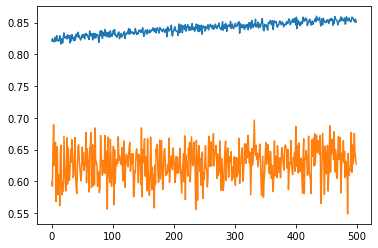

In [45]:
plt.plot(history.history['acc'], label = "Acc")
plt.plot(history.history['val_acc'], label = "Val Acc")

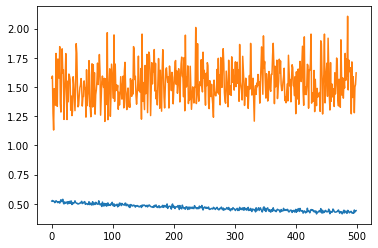

In [46]:
plt.plot(history.history['loss'],  label = "Loss")
plt.plot(history.history['val_loss'],  label = "Val loss")

In [ ]:
image=load_img("raw-img/elefante/OIP---LeldVL441fx5S66TGgVQAAAA.jpeg",target_size=(75,75))
predict_image(image)
plt.imshow(image)
plt.show()
image=load_img("raw-img/gatto/1006.jpeg",target_size=(75,75))
predict_image(image)
plt.imshow(image)
plt.show()
image=load_img("raw-img/farfalla/OIP--7K5JzW1ZEmrY2YRyVjFCQHaE7.jpeg",target_size=(75,75))
predict_image(image)
plt.imshow(image)
plt.show()